# Problem #1 Happiness

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import warnings
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
import seaborn as sns

In [4]:
os.chdir(r'C:\Users\gwhit\Desktop\Gavin\1st semester\STAT 517 Learning-Predictive Modeling\Stat517-master\Data')

In [5]:
happyfn = 'World_Happiness_2015.csv'
happy_2015 = pd.read_csv(happyfn)
happyfn = 'World_Happiness_2016.csv'
happy_2016 = pd.read_csv(happyfn)
happyfn = 'World_Happiness_2017.csv'
happy_2017 = pd.read_csv(happyfn)

In [15]:
happy_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Visualization

Below are a few plots that compare some of the features to the happiness rank to get to know the data we are working with a little bit better.

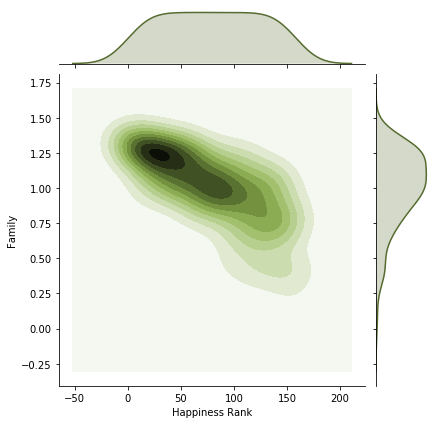

In [19]:
sns.jointplot("Happiness Rank", "Family", data=happy_2015, kind='kde', color = 'darkolivegreen');

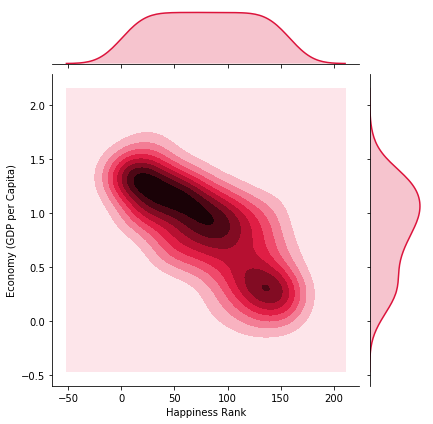

In [17]:
sns.jointplot("Happiness Rank", r"Economy (GDP per Capita)", data=happy_2015, kind='kde', color = 'crimson');

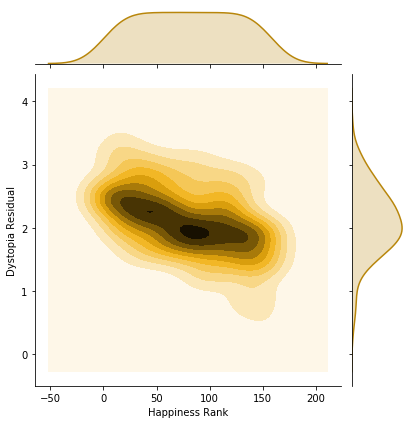

In [21]:
sns.jointplot("Happiness Rank", "Dystopia Residual", data=happy_2015, kind='kde', color = 'darkgoldenrod');

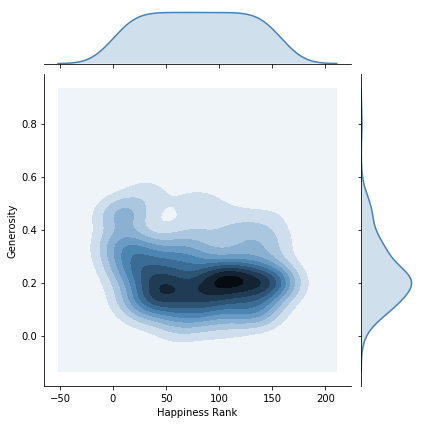

In [18]:
sns.jointplot("Happiness Rank", "Generosity", data=happy_2015, kind='kde', color = 'steelblue');

# Preprocessing

In [7]:
happy_2015 = pd.get_dummies(happy_2015, columns =[u'Country','Region'])
happy_2015.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,1,0,0,0,0


# Partitioning the Data

In [8]:
Y_happy_2015 =happy_2015[u'Happiness Rank']
X_happy_2015 = happy_2015.drop([u'Happiness Rank','Happiness Score','Standard Error'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_happy_2015, Y_happy_2015,
                                                random_state=9)
Xcolnames = list(X_happy_2015)

In [9]:
scaler = StandardScaler()
scaler.fit(X_happy_2015)
X_scaled = scaler.transform(X_happy_2015)

# Principle Component Analysis

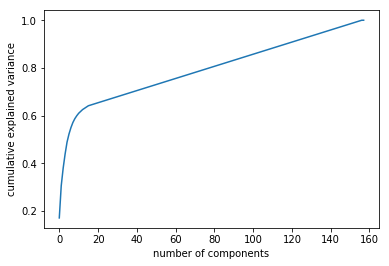

In [10]:
pca = PCA().fit(X_happy_2015)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
pca = PCA(n_components=2)
pca.fit(X_happy_2015)
X_happy_2015_2PCA = pca.transform(X_happy_2015)

# Determining Optimal Number of Clusters

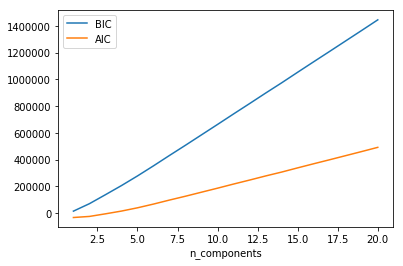

In [12]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_happy_2015)
          for n in n_components]

plt.plot(n_components, [m.bic(X_happy_2015) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_happy_2015) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Based on the BIC vs AIC curve it looks like the optimal number of clusters is 2

In [13]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_happy_2015)
    kmeanModel.fit(X_happy_2015)
    distortions.append(sum(np.min(cdist(X_happy_2015, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_happy_2015.shape[0])

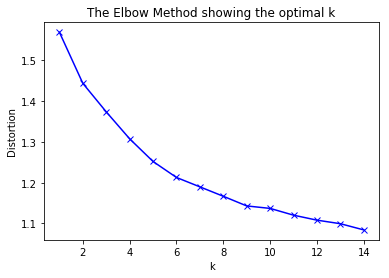

In [14]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the elbow method it looks like the optimal number of clusters is 2 or 6

# Visualization with the first 2 principle components

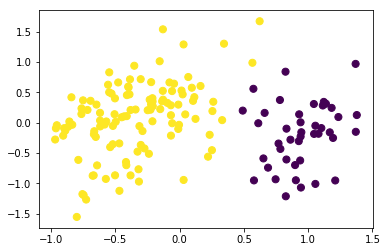

In [15]:
#Spectral Clustering using PCA1 and PCA2
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_happy_2015_2PCA)
plt.scatter(X_happy_2015_2PCA[:, 0], X_happy_2015_2PCA[:, 1], c=labels,
            s=50, cmap='viridis');

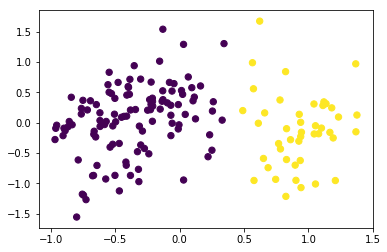

In [16]:
gmm = GMM(n_components=2).fit(X_happy_2015_2PCA)
labels = gmm.predict(X_happy_2015_2PCA)
plt.scatter(X_happy_2015_2PCA[:, 0], X_happy_2015_2PCA[:, 1], c=labels, s=40, cmap='viridis');

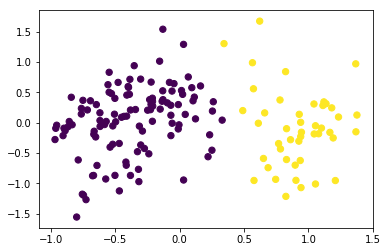

In [17]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X_happy_2015_2PCA)
labels = clustering.labels_
plt.scatter(X_happy_2015_2PCA[:, 0], X_happy_2015_2PCA[:, 1], c=labels, s=40, cmap='viridis')

# Clustering using the Entire Dataset

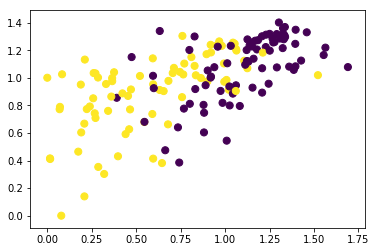

In [18]:
#Spectral Clustering using PCA1 and PCA2
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_happy_2015)
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

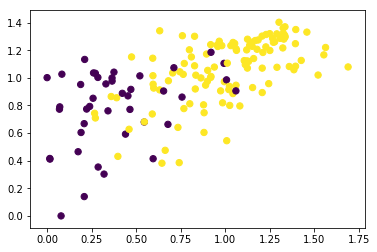

In [19]:
gmm = GMM(n_components=2).fit(X_happy_2015)
labels = gmm.predict(X_happy_2015)
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels, s=40, cmap='viridis');

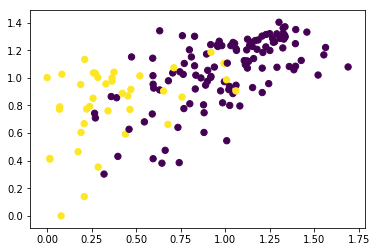

In [20]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X_happy_2015)
labels = clustering.labels_
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels, s=40, cmap='viridis')

# Comparing Various Linkages 

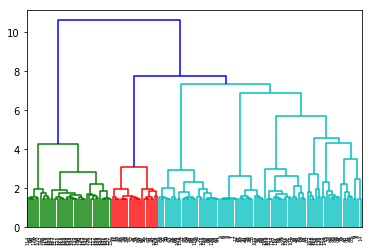

In [21]:
Z = linkage(X_happy_2015, 'ward')
dn = dendrogram(Z)

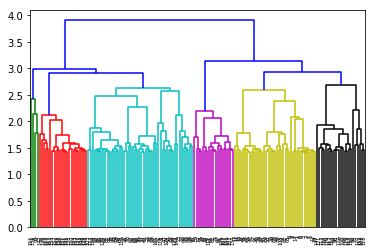

In [22]:
Z = linkage(X_happy_2015, 'complete')
dn = dendrogram(Z)

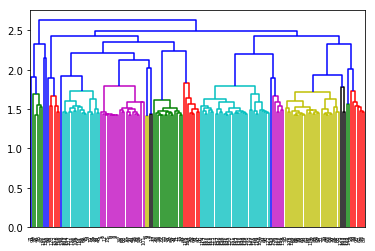

In [23]:
Z = linkage(X_happy_2015, 'weighted')
dn = dendrogram(Z)

# Seriation

In [24]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

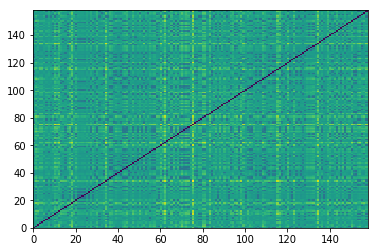

In [25]:
N = len(X_happy_2015)
X = X_happy_2015.iloc[np.random.permutation(N),:]

dist_mat = squareform(pdist(X))

plt.pcolormesh(dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()


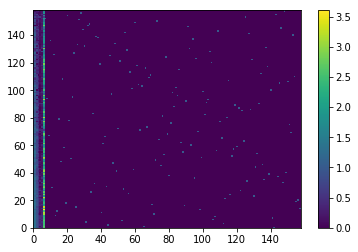

In [26]:
dist_mat = squareform(pdist(X_happy_2015))

N = len(X_happy_2015)
plt.pcolormesh(X_happy_2015)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [28]:
happyfn = 'World_Happiness_2015.csv'
df = pd.read_csv(happyfn)
df = df[['Country','Happiness Rank']]

------------------------------------------------------------------------------------------
Method:	 ward


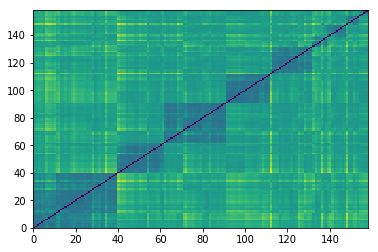

                      Country  Happiness Rank
113                     Ghana             114
83                      China              84
95     Bosnia and Herzegovina              96
121                  Ethiopia             122
76                 Kyrgyzstan              77
99                   Mongolia             100
146                Madagascar             147
92                  Macedonia              93
118                     Haiti             119
114                  Zimbabwe             115
129                   Georgia             130
153                    Rwanda             154
156                   Burundi             157
116                     India             117
122              Sierra Leone             123
120                     Nepal             121
112              South Africa             113
124                     Kenya             125
148                      Chad             149
155                     Syria             156
142                     Gabon     

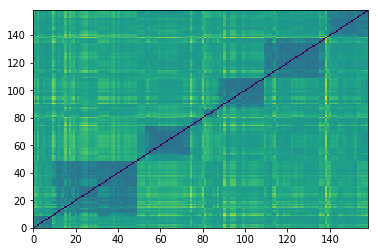

                    Country  Happiness Rank
143                   Niger             144
22                Venezuela              23
127                Botswana             128
32                 Colombia              33
73                Indonesia              74
97       Dominican Republic              98
59                   Poland              60
72                  Estonia              73
88                   Latvia              89
152             Afghanistan             153
141                 Senegal             142
69             Turkmenistan              70
89              Philippines              90
111                    Iraq             112
126                 Armenia             127
146              Madagascar             147
135                   Yemen             136
129                 Georgia             130
153                  Rwanda             154
156                 Burundi             157
99                 Mongolia             100
137                    Mali     

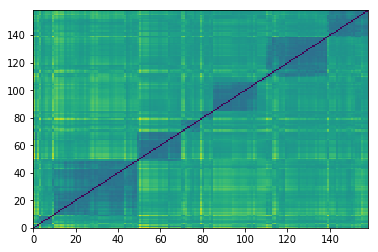

                     Country  Happiness Rank
154                    Benin             155
96                   Lesotho              97
130                   Malawi             131
79                Azerbaijan              80
77                   Nigeria              78
119         Congo (Kinshasa)             120
151             Burkina Faso             152
107  Palestinian Territories             108
115                  Liberia             116
152              Afghanistan             153
129                  Georgia             130
146               Madagascar             147
114                 Zimbabwe             115
92                 Macedonia              93
118                    Haiti             119
99                  Mongolia             100
76                Kyrgyzstan              77
83                     China              84
95    Bosnia and Herzegovina              96
121                 Ethiopia             122
89               Philippines              90
113       

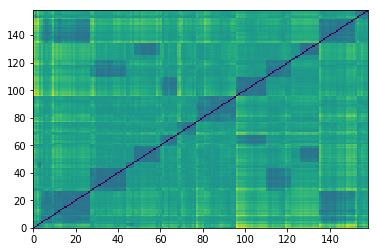

                      Country  Happiness Rank
154                     Benin             155
130                    Malawi             131
70                  Mauritius              71
98                       Laos              99
141                   Senegal             142
69               Turkmenistan              70
135                     Yemen             136
111                      Iraq             112
126                   Armenia             127
152               Afghanistan             153
153                    Rwanda             154
156                   Burundi             157
148                      Chad             149
155                     Syria             156
139                   Comoros             140
150               Ivory Coast             151
140                    Uganda             141
144                  Cambodia             145
137                      Mali             138
149                    Guinea             150
123                Mauritania     

In [29]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("------------------------------------------------------------------------------------------")
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()
    

    sorter = res_order
    sorterIndex = dict(zip(sorter,range(len(sorter))))
    df['my_Rank'] = df['Happiness Rank'].map(sorterIndex)
    df.sort_values(['Country','Happiness Rank', 'my_Rank'], \
        ascending = [True, True, True], inplace = True)
    df.drop('my_Rank', 1, inplace = True)
    df['my_Rank'] = df['Happiness Rank'].map(sorterIndex)
    df.sort_values(['my_Rank', 'Happiness Rank', 'my_Rank'], \
        ascending = [True , True, True], inplace = True)
    df.drop('my_Rank', 1, inplace = True)
    print(df)
    print("------------------------------------------------------------------------------------------")

The above output compares 4 different methods to produce seriation results. It looks like the ward and average method produces results that are the most consistent with the actual rankings. The first column is just a zero indexed version of the right column. 

 Based on the seration results from 2015 I can do my best to answer the following questions.
 
 1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017
 
Based on these four seration methods in 2015 we can say that Norway can't top the happiness rankings for all three years because it does not do so in 2015. Norway ranks in the "top" 10 based on the ward method in 2015

 2) All top ten countries rank highly on all the main features found to support happiness
 
All top ten countries appear to rank relatively low based on their features. The seration appears to be giving us the least happy countries first. Although that is just based off of a hunch. If say the bottom countries are the "top" countries then in some methods it does appear that those countries rank highly in the main features that supposedly support happiness. 

 3) Happiness is both social and personal
 
I think that based off of the data this can be supported in that it appears that the difference in family (could be considered social) and Life Expectancy and GDP (could be considered personal has an effect on the output of the seration. I don't think that there are enough relevent features to make a conclusion regarding this. 

 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness
 
There are no features that describe unemployment or quality of work. We could possibly make some (uniformed) conclusions based off of GDP per capita but I don't think they would be valid.

 5) China are no happier than most countries, though richer and longer longevity
 
Based off of the ward method for seration it appears that China is much less happy than other countries despite being richer and having longer longevity.

 6) Much of Africa is struggling
 
I think that this is a fair assesment of the data. On most of the seration methods it appears that 5 of top 10 least happy countries are African. 

 7) Happiness has fallen in America
 
Without doing seration analysis for the 2016 and 2017 datasets I cannot answer this question due to time constraints